# **Tasks Notebook**
### Emerging Technologies
---
#### Ryan Harte (G00338424)
---

## **Table of Contents**

1. [Introduction](#intro)
2. [The Collataz Conjecture - (Task 1)](#collatzconjecture)
3. [Square Root in Python: Newtons Method - (Task 2)](#squareroot)
4. [Random Function Selection - (Task 3)](#rfunction)
5. [Matrix Multiplication - (Task 4)](#matrixmultiplication)
6. [Quantum Circuits/Logic Gates](#qiskit)
7. [References](#refcc)

<a id="intro"></a>
## **Introduction**

This Jupyter Notebook contains the various tasks that have been researched as part of the Emerging Technologies module.

<a id="collatzconjecture"></a>
## **The Collatz Conjecture - Task 1**
The Collatz Conjecture is a mathematical puzzle that begins with any positive integer. It is one of the most famous unsolved problems in mathematics, primarily because of its simple formulation and complex behavior.

#### **The Collatz Conjecture Implementation**
1. Start with any positive integer __*n*__.
2. If __*n*__ is even, divivde by 2: f(2/__*n*__).
3. If __*n*__ is odd, multiply by 3 and add 1: f(3(__*n*__)+1)
4. Take the result as the new __*n*__ and repeat steps 2 and 3 respectively.
[*[1.0]*](#refcc)

Now that we know how the Collatz Conjecture works we can begin discussing what it aims to prove.

Overall, the Collatz Conjecture aims to assert that no matter what __*positive integer*__ a person starts using the above method with, that you will always end up with the same end result = 1. Once you take any positive integer and use the Collatz Conjecture formula, you will eventually end up with a result of 1 that then loops in the form of 1, 4, 2, 1, 4, 2, 1... and so on. 

While The Collatz Conjecture is easy to understand, many mathematicians have fallen "under it's trance". “This is a really dangerous problem. People become obsessed with it and it really is impossible,” said *Jeffrey Lagarias*, a mathematician at the University of Michigan and an expert on the Collatz conjecture. [*[1.1]*](#refjl) 

Unpredictable behaviour, exponential growth and a lack of counterexmamples make the Collatz Conjecture very hard to prove.
1. Unpredictable behaviour: The sequences of numbers and results produced by the Collatz Conjecture is nothing short of erratic. Some numbers grow exponentially before shrinking again, others are very quick to hit the end result of 1. It is because of this, a pattern is hard to discern or even to begin forumlating a general method to prove the problem true
2. Exponential Growth: As I stated above, some numbers grown exponentially as the odd number results have to follow the funtion f(3(__*n*__)+1). As a result some numbers become too hard to track even with computational methods and to predict this kind of explosive growth is a challenge.
3. Computational methods have been used to test the conjecture for very large numbers, and it has always held true. While this doesn't prove the conjecture, it does give evidcence that if there is an exception, it's likely to be a very large number or a unique property that hasn't been discerned yet. This relates back to point 2 where some numbers become so large or hard to track.

Earlier this year, a mathematician by the name *Terence Tao* posted proof that the The Collatz Conjecture is almost true for almost all numbers [*[1.2]*](#refTT).  While Terence Tao's results do not fully prove the mathematical problem, it is a major advancement on the topic.

#### **The Collatz Conjeccture in python**

Below is verification that for the first 10,000 positive integers that the Collatz Conjecture is indeed true.

In [17]:
def collatz_sequence(n):
    # Keep looping until we reach the number 1.
    while n != 1:
        # If the number is even, divide by 2
        if n % 2 == 0:
            n = n // 2
        else:
            # If the number is odd, multiply it by 3 and add 1.
            n = 3*n + 1
    # If the loop finishes, we've successfully reached 1 and returns "True".
    return True

def verify_collatz_conjecture(limit):
    # Loop through every number from 1 up to the limit.
    for i in range(1, limit+1):
        # For each number, generate its Collatz sequence.
        # If any sequence doesn't reach 1, the function will return False.
        if not collatz_sequence(i):
            return False
    # If all sequences reach 1, return True.
    return True

# Use the above function to verify the Collatz Conjecture for the first 10,000 integers.
if verify_collatz_conjecture(10000):
    print("The Collatz Conjecture holds true for the first 10,000 positive integers.")
else:
    print("The Collatz Conjecture does not hold true for the first 10,000 positive integers.")


The Collatz Conjecture holds true for the first 10,000 positive integers.


Below you can enter any positive integer to get the Collatz Sequence of that number and if it holds true.

In [18]:
from IPython.display import display, clear_output

def collatz_sequence(n):
    """Generate and return the Collatz sequence for a given number 'n'."""
    sequence = [n]
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3*n + 1
        sequence.append(n)
    return sequence

def verify_collatz_conjecture(limit):
    """Verify the Collatz Conjecture up to a given limit."""
    for i in range(1, limit+1):
        if len(collatz_sequence(i)) == 1:  # If only '1' is in the sequence, then it didn't work.
            return False
    return True

# Get a number from the user.
while True:
    try:
        num = int(input("Enter a positive integer: "))
        
        # Check if the number is odd.
        if num % 2 != 0:
            print(f"The number {num} is odd.")
            continue  # This will skip the rest of the loop and prompt the user again.
        
        # Ensure the input is positive.
        if num <= 0:
            print("Please enter a positive integer.")
            clear_output(wait=True)
            continue
        
        # Print the Collatz sequence for the entered number.
        sequence = collatz_sequence(num)
        print(f"The Collatz sequence for {num} is: {sequence}")
        
        # Verify the Collatz Conjecture up to the entered number.
        if verify_collatz_conjecture(num):
            print(f"\nThe Collatz Conjecture holds true for the first {num} positive integers.")
        else:
            print(f"\nThe Collatz Conjecture does not hold true for the first {num} positive integers.")
        break
    except ValueError:
        print("Please enter a valid positive integer.")
        clear_output(wait=True)


The Collatz sequence for 2 is: [2, 1]

The Collatz Conjecture does not hold true for the first 2 positive integers.


<a id="squareroot"></a>
## **Square Root in Python: Newtons Method - Task 2**

In [19]:
def sqrt(x):
    # Start with an initial guess
    z = x / 2.0
    
    # Keep iterating until the difference between two consecutive guesses is below the threshold
    while abs(x - z * z) > 0.01:
        z = z - (z * z - x) / (2 * z)
    
    return z

# Test the function
number = float(input("Enter a number to find its square root: "))
print(f"Approximate square root of {number} is {sqrt(number)}")

Approximate square root of 2.0 is 1.4166666666666667


<a id="rfunction"></a>
## **Random Function Selection - Task 3**

Here we are exploring the number of unique functions that can be created with 'four bits' as our input, that then outputs a single bit as our result. Since each bit produced has only two possibilities (0 or 1) and we know the inputs are four bits, we can conclude 2<sup>4</sup>=16 possible input combinations for the functions.
For each of those input combinations there can be a result of 0 or 1 (as previously mentioned). This means that there are 2<sup>16</sup>=65,536 possible function results for the algorithm to produce. All in all out of 65,536 results, this algorithm will produce 2<sup>4</sup>=16 possible input combinations out of the total 65,536 each time, at random.



In [20]:
import random
import itertools as it

def create_f():
    outputs = [random.choice([0,1])for i in  range (16)]
    def f(x1, x2, x3, x4):
        i = x1 * 2**3  + x2 * 2**2 + x3 * 2**1 + x4 * 2**0
        return outputs [i]
    return f

my_f = create_f()

my_f (0,0,0,0)

[random.choice([0,1])for i in  range (8)]


[0, 1, 1, 1, 0, 0, 0, 1]

In [21]:
list(it.product([0,1], repeat=4))

for inputs in it.product([0,1], repeat=4):
    print(f"{inputs} -> {my_f(*inputs)}")

(0, 0, 0, 0) -> 1
(0, 0, 0, 1) -> 1
(0, 0, 1, 0) -> 0
(0, 0, 1, 1) -> 1
(0, 1, 0, 0) -> 1
(0, 1, 0, 1) -> 1
(0, 1, 1, 0) -> 0
(0, 1, 1, 1) -> 1
(1, 0, 0, 0) -> 0
(1, 0, 0, 1) -> 0
(1, 0, 1, 0) -> 1
(1, 0, 1, 1) -> 1
(1, 1, 0, 0) -> 0
(1, 1, 0, 1) -> 1
(1, 1, 1, 0) -> 0
(1, 1, 1, 1) -> 0


<a id="matrixmultiplication"></a>
## **Matrix Multiplication - Task 4**

This function takes two matrices A and B as input. It first checks if the matrices are of compatible dimensions (same size rows and columns). If they are, it initializes a result matrix filled with zeros and then iterates through each element, calculating the dot product of rows of A with columns of B.

The dot product [*[4.0]*](#dotp) is a way of multiplying two arrays (or vectors) to get a single number (scalar). In the context of matrix multiplication, the dot product is used to multiply the corresponding elements of a row of one matrix with a column of another and then summing these products together.

#### **Matrix Multiplication in python**
[*[4.1]*](#matrixcode)

In [22]:
import numpy as np

array1 = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # 2x3 matrix 
array2 = np.array([[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]])  # 3x2 matrix 

# Multiply the matrices using np.matmul()
product = np.matmul(array1, array2)

print(product)

[[ 58.  64.]
 [139. 154.]]


In [23]:
import numpy as np

array1 = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # 2x3 matrix 
array2 = np.array([[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]])  # 3x2 matrix

# Store the multiplication steps as strings for display -> eg. 1.0*7.0 etc
calculation_steps_matrix = []

# Iterate through each cell of the result and calculate the result manually
# Loop through rows of array1 and columns of array2
for i in range(array1.shape[0]):
    row_steps = []  # Store calculation steps for each row

    for j in range(array2.shape[1]):
        calculation_steps = []  # Store multiplication steps for each element
        sum_result = 0.0  # Initialize sum for the current element

        # Calculate dot product for the element
        for k in range(array1.shape[1]):
            multiplication = array1[i, k] * array2[k, j]  # Multiply elements
            sum_result += multiplication  # Add to the sum
            calculation_steps.append(f"{array1[i, k]}*{array2[k, j]}")  # Record step

        # Combine all steps into a single string
        row_steps.append(f"({' + '.join(calculation_steps)}) = {sum_result}")

    # Add the row's calculations to the overall list
    calculation_steps_matrix.append(row_steps)

# Multiply the matrices using np.matmul() -> just like before
product = np.matmul(array1, array2)

# Print the result and the calculation steps
print("Resulting matrix:")
print(product)
print("\nCalculation steps:")
for row in calculation_steps_matrix:
    print(" | ".join(row))

Resulting matrix:
[[ 58.  64.]
 [139. 154.]]

Calculation steps:
(1.0*7.0 + 2.0*9.0 + 3.0*11.0) = 58.0 | (1.0*8.0 + 2.0*10.0 + 3.0*12.0) = 64.0
(4.0*7.0 + 5.0*9.0 + 6.0*11.0) = 139.0 | (4.0*8.0 + 5.0*10.0 + 6.0*12.0) = 154.0


<a id="qiskit"></a>
## **Quantum Circuits/Logic Gates**


Total count for 00 and 11 are: {'00': 485, '11': 515}


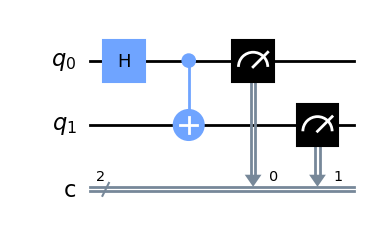

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

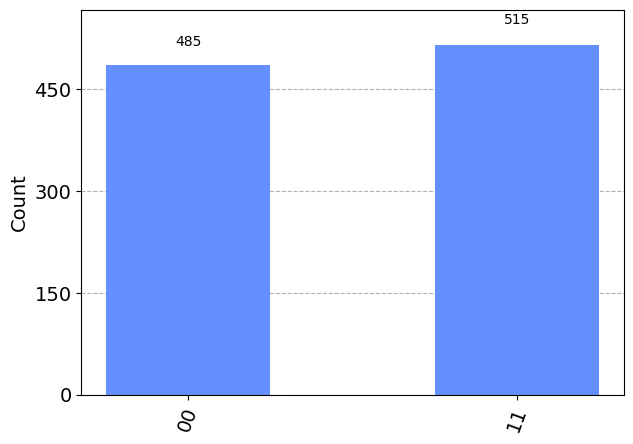

In [2]:
# Plot a histogram
plot_histogram(counts)

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 473, '11': 527}


## **References**
<a id="refcc"></a>
*[1.0]* - Rana, Ajay Singh. "Implementing 3x1 in Python." HackerNoon, 2023

https://hackernoon.com/implementing-3x1-in-python.


<a id="refjl"></a>
*[1.1]* - Hartnett, Kevin. "Mathematician Proves Huge Result on 'Dangerous Problem'." Quanta Magazine, 11 Dec. 2019

https://www.quantamagazine.org/mathematician-proves-huge-result-on-dangerous-problem-20191211/.


<a id="reftt"></a>
*[1.2]* - Tao, Terence. "Almost all orbits of the Collatz map attain almost bounded values." arXiv, 15 February 2022 

https://arxiv.org/abs/1909.03562.


<a id="dotp"></a>
*[4.0]* - Sheldon, Robert. "What is dot product (scalar product)?" TechTarget, Oct. 2022

https://www.techtarget.com/whatis/definition/dot-product-scalar-product#:~:text=The%20dot%20product%2C%20also%20called,one%20or%20both%20of%20them.


<a id="matrixcode"></a>
*[4.1]* - Python for Data Science, "How to perform Matrix Multiplication with Numpy Python" Board Infinity

https://www.boardinfinity.com/blog/how-to-perform-matrix-multiplication-with-numpy-python/#:~:text=In%20order%20to%20determine%20the,the%20inputs%20board_arr1%20and%20board_arr2.